<a href="https://colab.research.google.com/github/PythonDSBook/notebooks/blob/main/Chapter08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 クラスタリング


## 8.5 プログラミング

### コード 8.1 ライブラリのインポート

In [ ]:
!pip install japanize_matplotlib

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

### コード 8.2 CSVファイルを読み込みデータフレームを作成
以下を実行してCSVファイルをダウンロードする。または、サポートページからCSVファイルをダウンロードしてColabの左側のファイルペインからアップロードする。

In [ ]:
!wget https://raw.githubusercontent.com/PythonDSBook/notebooks/main/data/weather.csv

In [10]:
df = pd.read_csv('weather.csv')

In [11]:
df

,地域,年平均気温,年間降水量
0,北海道,10.0,905.0
1,青森県,11.6,1417.0
2,岩手県,11.4,1462.0
3,宮城県,13.7,1247.0
4,秋田県,12.8,2022.5
5,山形県,13.0,1284.5
6,福島県,14.1,1224.5
7,茨城県,15.0,1422.0
8,栃木県,15.0,1353.5
9,群馬県,15.8,1315.5


### コード 8.3 特徴の標準化

In [12]:
X = df[['年平均気温', '年間降水量']].values
X = (X - X.mean(axis=0)) / X.std(axis=0)

### コード 8.4 階層化クラスタリングの実行

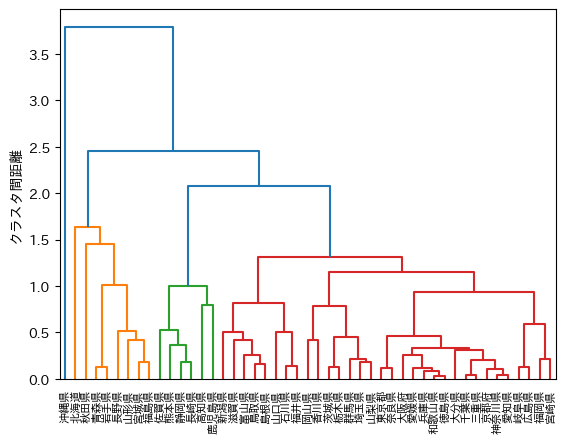

In [13]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(X, metric='euclidean', method='average')
dendrogram(clusters, labels=df['地域'].values,
            color_threshold=1.8)
plt.ylabel('クラスタ間距離')
plt.show()

図の大きさを指定

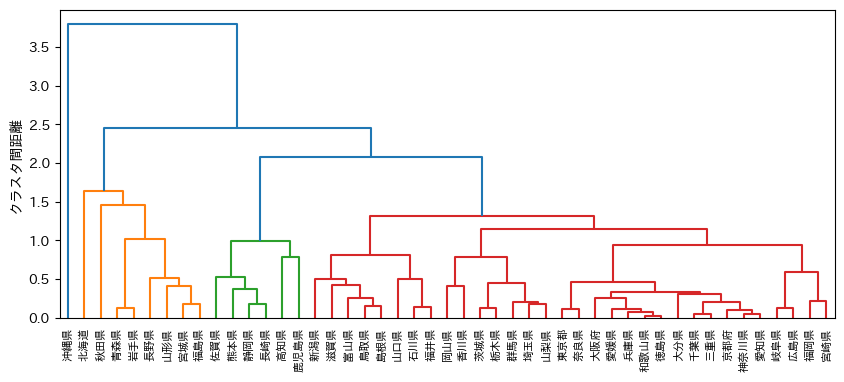

In [14]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 4))

clusters = linkage(X, metric='euclidean', method='average')
dendrogram(clusters, labels=df['地域'].values,
            color_threshold=1.8)
plt.ylabel('クラスタ間距離')
plt.show()

### プログラム 8.1 関数`squared_euclid_dist`

In [15]:
def squared_euclid_dist(vec1, vec2):
  return np.sum((vec1 - vec2) ** 2)

### プログラム 8.2 関数`k_means`

In [16]:
def k_means(X, k, max_iterations=10, random_seed=0):
  np.random.seed(random_seed)
  m = X.shape[0]
  centroids = X[np.random.choice(m, k, replace=False)]
  clusters = np.zeros(m)
  dist_matrix = np.zeros((m, k))

  for iteration in range(max_iterations):

    for i in range(m):
      for j in range(k):
        dist_matrix[i, j] = squared_euclid_dist(
            X[i], centroids[j]
        )
    clusters = np.argmin(dist_matrix, axis=1)

    for j in range(k):
      centroids[j] = np.mean(X[clusters == j], axis=0)

  cost = np.sum((X - centroids[clusters]) ** 2)

  return clusters, centroids, cost

In [17]:
def k_means(X, k, max_iterations=10, random_seed=0):
  np.random.seed(random_seed)
  m = X.shape[0]
  centroids = X[np.random.choice(m, k, replace=False)]
  clusters = np.zeros(m)
  dist_matrix = np.zeros((m, k))

  for iteration in range(max_iterations):

    for i in range(m):
      for j in range(k):
        dist_matrix[i, j] = squared_euclid_dist(X[i], centroids[j])
    clusters = np.argmin(dist_matrix, axis=1)

    for j in range(k):
      centroids[j] = np.mean(X[clusters == j], axis=0)

  cost = np.sum((X - centroids[clusters]) ** 2)

  return clusters, centroids, cost

### コード 8.5 K-means法によるクラスタリングの実行

In [18]:
k = 4
clusters, centroids, cost = k_means(X, k)

### コード 8.6 各事例に割り当てられたクラスタのラベル

In [19]:
print(clusters)

[3 3 3 3 3 3 3 0 0 0 0 0 0 0 2 2 2 2 0 3 2 1 0 0 2 0 0 0 0 0 2 2 0 2 2 0 0
 0 1 1 1 1 1 0 1 1 1]


### コード 8.7 セントロイド

In [20]:
print(np.round(centroids, 2))

[[ 0.24 -0.56]
 [ 1.09  1.48]
 [-0.12  0.58]
 [-1.68 -0.98]]


### コード 8.8 クラスタリング結果の可視化

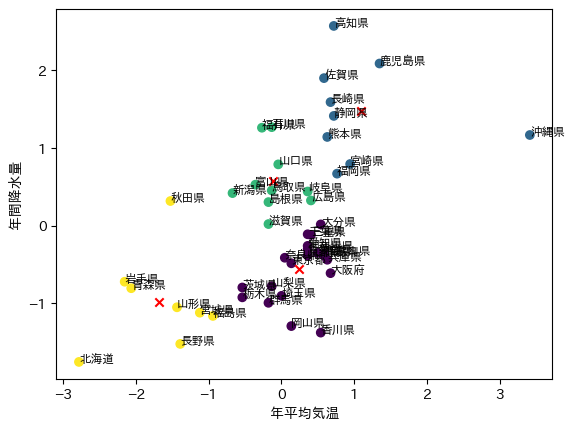

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
labels = df.loc[:, '地域'].values
for i, label in enumerate(labels):
  plt.annotate(label, (X[i, 0], X[i, 1]), fontsize='small')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x',
            c='red')
plt.xlabel('年平均気温')
plt.ylabel('年間降水量')
plt.show()

図の大きさを指定

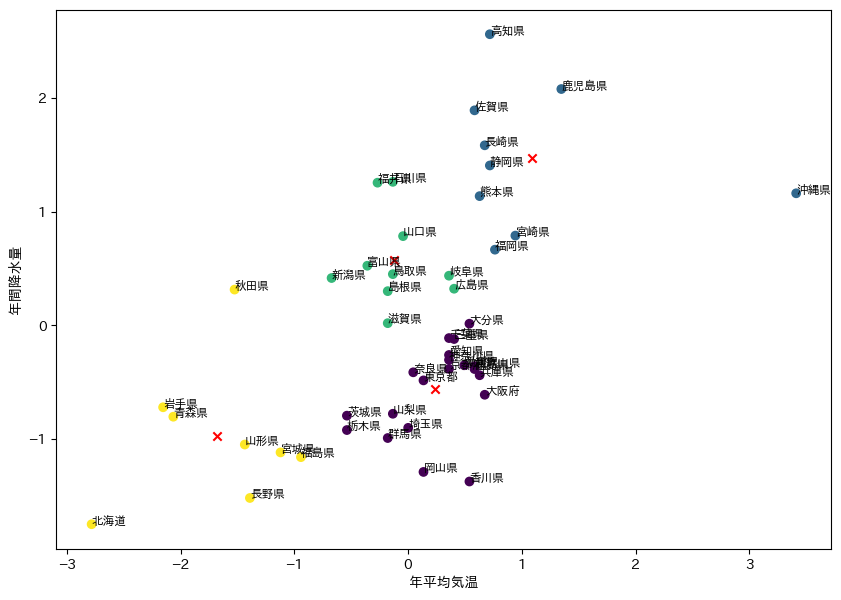

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
labels = df.loc[:, '地域'].values
for i, label in enumerate(labels):
  plt.annotate(label, (X[i, 0], X[i, 1]), fontsize='small')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x',
            c='red')
plt.xlabel('年平均気温')
plt.ylabel('年間降水量')
plt.show()

### コード 8.9 scikit-learnの`KMeans`クラスによるK-means法

In [23]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0).fit(X)
print(model.labels_)
print(model.cluster_centers_)
print(model.inertia_)

[3 3 3 3 3 3 3 1 1 1 1 1 1 1 2 2 2 2 1 3 2 0 1 1 2 1 1 1 1 1 2 2 1 2 2 1 1
 1 0 2 0 0 0 1 0 0 0]
[[ 1.12849672  1.57757196]
 [ 0.24104833 -0.56298501]
 [-0.0398427   0.58598014]
 [-1.67633384 -0.97583213]]
22.507656721866137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
from sklearn.cluster import KMeans
model = KMeans(n_init='auto', n_clusters=4, random_state=0).fit(X)
print(model.labels_)
print(model.cluster_centers_)
print(model.inertia_)

[2 2 2 2 3 2 2 1 1 1 1 1 1 1 3 3 3 3 1 2 3 0 1 1 3 1 1 1 1 1 3 3 1 3 3 1 1
 1 0 0 0 0 0 1 0 0 0]
[[ 1.0879825   1.47633901]
 [ 0.24104833 -0.56298501]
 [-1.69797111 -1.16027298]
 [-0.24791013  0.5540509 ]]
22.571201320851273
